## ML Project: Employee Turnover Analytics

## __Data Preprocessing__


**Import Required Libraries**

- Import pandas and NumPy libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler


**Load the Dataset**

In [54]:
df = pd.read_csv(r"HR_comma_sep.csv")


In [55]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
# Rename the 'sales' column to 'department'
df = df.rename(columns={'sales': 'department'})

In [57]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [58]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- There are no missing values

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [60]:
df.shape

(14999, 10)

In [61]:
turnover_rate= df.left.value_counts() / 14999
turnover_rate

left
0    0.761917
1    0.238083
Name: count, dtype: float64

In [62]:

print("Number of employees who left:", df['left'].sum())
print("Number of employees who did not leave:", len(df) - df['left'].sum())


Number of employees who left: 3571
Number of employees who did not leave: 11428


Data is **highly imbalanced** for the training dataset as the record of people **who left** is very low in comparision to the record of people **who didn't leave**.

**Split the Dataset**

- Split the dataset into training and testing sets

In [63]:
# Step 1: Separate categorical variables and numeric variables
categorical_cols = ['department', 'salary']
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

# Step 2: Apply get_dummies() to the categorical variables
categorical_df = pd.get_dummies(df[categorical_cols])

# Step 3: Combine categorical variables and numeric variables
processed_df = pd.concat([categorical_df, df[numeric_cols], df['left']], axis=1)

In [64]:
# Separate the features (X) and target variable (y)
X = processed_df.drop('left', axis=1)
y = processed_df['left']


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [66]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
# Print the shapes of the resampled data
print("Shapes after SMOTE:")
print("X_train_resampled:", X_train_resampled.shape)
print("y_train_resampled:", y_train_resampled.shape)

Shapes after SMOTE:
X_train_resampled: (18268, 20)
y_train_resampled: (18268,)


## __Algorithm 1:  Decision Tree__


**Train the Decision Tree Classifier**
- Import DecisionTreeClassifier from sklearn.tree
- Train the model using the training dataset

**Before Perform Hyperparameter Tuning with GridSearchCV**


In [68]:
clf1 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=50)   
clf1.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=42)

**Make Predictions**

- Predict the outcomes using the testing dataset

In [69]:
y_predict = clf1.predict(X_test)


**Evaluate the Model**

- Import accuracy_score, classification_report, and confusion_matrix from sklearn.metrics
- Calculate the accuracy score

In [70]:
# Assuming y_test contains the true labels and y_predict contains the predicted labels
dt_accuracy1 = accuracy_score(y_test, y_predict)
print("Accuracy:", dt_accuracy1)
print("-"*20)
dt_cm1 = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(dt_cm1)
print("-"*20)
classification_report_dt = classification_report(y_test, y_predict, zero_division=1)
print("Classification Report:")
print(classification_report_dt)

Accuracy: 0.9123333333333333
--------------------
Confusion Matrix:
[[2081  213]
 [  50  656]]
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2294
           1       0.75      0.93      0.83       706

    accuracy                           0.91      3000
   macro avg       0.87      0.92      0.89      3000
weighted avg       0.92      0.91      0.92      3000



**Plot the decision tree**
- We will plot the decision tree using an export_tree

In [71]:
target = list(df['left'].unique())
feature_names = list(X.columns)
r = export_text(clf1, feature_names=feature_names)
print(r)

|--- satisfaction_level <= 0.47
|   |--- time_spend_company <= 4.50
|   |   |--- time_spend_company <= 2.50
|   |   |   |--- class: 0
|   |   |--- time_spend_company >  2.50
|   |   |   |--- class: 1
|   |--- time_spend_company >  4.50
|   |   |--- satisfaction_level <= 0.11
|   |   |   |--- class: 1
|   |   |--- satisfaction_level >  0.11
|   |   |   |--- class: 0
|--- satisfaction_level >  0.47
|   |--- time_spend_company <= 4.50
|   |   |--- time_spend_company <= 3.50
|   |   |   |--- class: 0
|   |   |--- time_spend_company >  3.50
|   |   |   |--- class: 0
|   |--- time_spend_company >  4.50
|   |   |--- last_evaluation <= 0.81
|   |   |   |--- class: 0
|   |   |--- last_evaluation >  0.81
|   |   |   |--- class: 1



**After Perform Hyperparameter Tuning with GridSearchCV**


In [72]:
para_grid = {'criterion' :['gini', 'entropy'], 'max_depth':[2,4,6,10,20], 'min_samples_split':[5,10,20, 50, 100]}
clf= GridSearchCV(DecisionTreeClassifier(), para_grid, cv=3, n_jobs=-1, scoring="accuracy")
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [73]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=100)

In [74]:
clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=100)   
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=42)

**Make Predictions**

- Predict the outcomes using the testing dataset

In [75]:
y_predict = clf.predict(X_test)

**Evaluate the Model**

- Import accuracy_score, classification_report, and confusion_matrix from sklearn.metrics
- Calculate the accuracy score

In [76]:
# Assuming y_test contains the true labels and y_predict contains the predicted labels
dt_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", dt_accuracy)
print("-"*20)
dt_cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(dt_cm)
print("-"*20)
report = classification_report(y_test, y_predict, zero_division=1)
print("Classification Report:")
print(report)

Accuracy: 0.96
--------------------
Confusion Matrix:
[[2260   34]
 [  86  620]]
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2294
           1       0.95      0.88      0.91       706

    accuracy                           0.96      3000
   macro avg       0.96      0.93      0.94      3000
weighted avg       0.96      0.96      0.96      3000



**Plot the decision tree**
- We will plot the decision tree using an export_tree

In [77]:
target = list(df['left'].unique())
feature_names = list(X.columns)
r = export_text(clf, feature_names=feature_names)
print(r)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- satisfaction_level <= 0.37
|   |   |   |   |--- class: 1
|   |   |   |--- satisfaction_level >  0.37
|   |   |   |   |--- average_montly_hours <= 158.50
|   |   |   |   |   |--- average_montly_hours <= 129.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- average_montly_hours >  129.50
|   |   |   |   |   |   |--- last_evaluation <= 0.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- last_evaluation >  0.47
|   |   |   |   |   |   |   |--- average_montly_hours <= 150.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- average_montly_hours >  150.50
|   |   |   |   |   |   |   |   |--- last_evaluation <= 0.52
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- last_evaluation >  0.52
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- average_montly

## __Algorithm 2: logistic regression__


**Train the logistic regression Classifier**
- Import LogisticRegression from sklearn.tree
- Train the model using the training dataset

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model  max_iter
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR)
print("Classification Report:")
classification_report_LR=classification_report(y_test, y_pred)
print(classification_report_LR)

Accuracy: 0.7843333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



In [80]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2116  178]
 [ 469  237]]


- True Negatives (TN): 2113
- False Positives (FP): 181
- False Negatives (FN): 546
- True Positives (TP): 160
60
60
eft.
w!


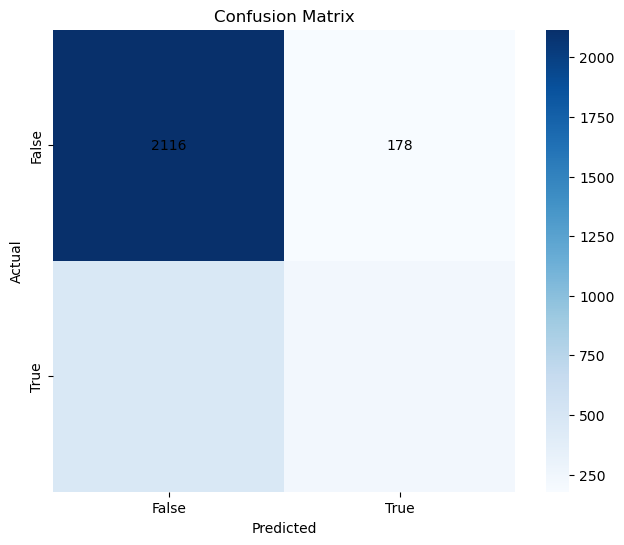

In [81]:

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["False", "True"], yticklabels=["False", "True"],
            annot_kws={"color": "black"}, square=True)  # Set square=True for equal cell sizes
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##  __Algorithm 3: k-Nearest Neighbors__


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [83]:


# Instantiate the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
classification_report_knn=classification_report(y_test, y_pred)
print(classification_report_knn)


Accuracy: 0.9316666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2294
           1       0.82      0.91      0.86       706

    accuracy                           0.93      3000
   macro avg       0.90      0.92      0.91      3000
weighted avg       0.94      0.93      0.93      3000



## __Classification Reports of All of the Binary Classification ALgorithms__

**Project Summary:**

- **Objective:** The goal of the project is to build a binary classification model to predict whether employees are likely to leave the company ("left") based on various features.
  
- **Dataset:** The dataset contains information about employees, including their satisfaction level, evaluation score, number of projects, average monthly hours worked, time spent at the company, whether they had a work accident, whether they received a promotion in the last 5 years, their department, and their salary level.
  
- **Target Variable:** The target variable is "left," which indicates whether an employee has left the company (1) or not (0).
  
- **Approach:** Three different classification al are used and compared based on the performance to determine which one works best for predicting employee turnover. The classification algorithms are (Logistic Regression, k-nearest Neighbors, and Decision Trees)n Trees.


In [84]:
from tabulate import tabulate

# Define your models and their corresponding Accuracy scores
models = {
    'Logistic Regression': accuracy_LR,
    'Decision Tree': dt_accuracy,
    'k-Nearest Neighbors': accuracy_knn,
}

# Convert the dictionary to a list of lists
table_data = [[model, accuracy] for model, accuracy in models.items()]

# Print the table
print(tabulate(table_data, headers=["Model", "Accuracy"]))


Model                  Accuracy
-------------------  ----------
Logistic Regression    0.784333
Decision Tree          0.96
k-Nearest Neighbors    0.931667


In [85]:
from tabulate import tabulate

# Define your models and their corresponding Classification Reports
reports = {
    'Logistic Regression': classification_report_LR,
    'k-Nearest Neighbors': classification_report_knn,
    'Decision Tree': classification_report_dt,
    # Add more models as needed
}

# Print the table
for model, report in reports.items():
    print(f"Classification Report for {model}:")
    print(report)
    print()


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000


Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2294
           1       0.82      0.91      0.86       706

    accuracy                           0.93      3000
   macro avg       0.90      0.92      0.91      3000
weighted avg       0.94      0.93      0.93      3000


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2294
           1       0.75      0.93      0.83       706

    accuracy                           0.91  